## COVID-19 Analysis using K Means Clustering

## Target Audience: Government, medical agencies, NGOs and all related to COVID-19 
 
### Problem Statement : Provide suggestion for medical check-up booths amid COVID-19 based on the areas, population, total number of cases in that area, hospitals in that area(to check the current medical facility status etc)

### Observed Problem: 

During the prime time of COVID-19, there was a requirement to identify the places where the medical and food supply is less and cases are more. Due to panic situation, a lot number of small industries are shut down and due to which there is lack of medicine and food. So I planned to identify the areas district wise in Delhi where proper supply of medicine and food is not there.

Data where you describe the data that will be used to solve the problem and the source of the data.
Approach to solve this problem:

Call the FourSquare API to get the details of Hospitals in Delhi
Collect the information about the hospitals with proper address,Pincode, sub-districts etc
Collect the information about each districts such as population, area, density etc.
Lastly collect the information about the current COVID-19 cases in each districts.
Now we have data such as positions of hospital names, areas, population, density, active cases, hospitals rating etc. Now we will combine all the data and will try to create clusters and find relations.

### Sources of data:

1. FourSquare API

2. https://www.indianmirror.com/india-post/indianpincode.html to get area, density, population etc

3. https://api.covid19india.org/csv/latest/district_wise.csv to get latest COVID-19 cases

4. Wikipedia and other sites to get hospitals districts.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the data
data = pd.read_csv('C:/Users/ejhajee/Downloads/book_readers_data.csv')
data.head()

,Age,Sex,Race,Marital status?,Education,Employement,Incomes,How many books did you read during last 12months?,Read any printed books during last 12months?,Read any audiobooks during last 12months?,Read any e-books during last 12months?,"Last book you read, you…",Do you happen to read any daily news or newspapers?,Do you happen to read any magazines or journals?
0,66,Male,Refused,Divorced,College graduate,Retired,"$20,000 to under $30,000",97,Yes,No,Yes,Purchased the book,No,Yes
1,46,Male,Native American/American Indian,Married,High school graduate,Employed full-time,"Less than $10,000",97,Yes,Yes,Yes,Purchased the book,Yes,Yes
2,32,Male,Mixed race,Never been married,High school graduate,Employed full-time,"Less than $10,000",97,No,Yes,Yes,Borrowed the book from a friend or family member,Yes,Yes
3,27,Male,Mixed race,Married,High school graduate,Employed full-time,"$40,000 to under $50,000",97,Yes,No,Yes,Borrowed the book from a library,Yes,No
4,16,Female,Mixed race,Never been married,High school incomplete,Employed part-time,"$10,000 to under $20,000",97,Yes,Yes,No,Purchased the book,Yes,No


In [3]:
# shape of data

data.shape

(2832, 14)

In [4]:
# information of the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2832 entries, 0 to 2831
Data columns (total 14 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   Age                                                  2832 non-null   int64 
 1   Sex                                                  2832 non-null   object
 2   Race                                                 2832 non-null   object
 3   Marital status?                                      2832 non-null   object
 4   Education                                            2832 non-null   object
 5   Employement                                          2832 non-null   object
 6   Incomes                                              2832 non-null   object
 7   How many books did you read during last 12months?    2832 non-null   int64 
 8   Read any printed books during last 12months?         2442 non-null   object
 9

In [38]:
data.fillna(data.mean(), inplace=True)

In [5]:
# check the distribution as per the color of wine

data.Age.value_counts()

50    78
65    76
60    72
47    70
17    68
      ..
91     3
92     2
90     2
89     2
93     1
Name: Age, Length: 78, dtype: int64

In [6]:
data.Sex.value_counts()

Female    1479
Male      1353
Name: Sex, dtype: int64

In [7]:
data.Race.value_counts()

White                              2217
Black or African-American           347
Asian or Pacific Islander            70
Mixed race                           63
Other                                58
Refused                              37
Native American/American Indian      31
Don’t know                            9
Name: Race, dtype: int64

In [107]:
data.describe()

,Age,Sex,Race,Marital status?,Education,Employement,Incomes,How many books did you read during last 12months?,Read any printed books during last 12months?,Read any audiobooks during last 12months?,Read any e-books during last 12months?,"Last book you read, you…",Do you happen to read any daily news or newspapers?,Do you happen to read any magazines or journals?,kmeans_cluster
count,2.832000e+03,2832.000000,2832.000000,2832.000000,2832.000000,2832.000000,2832.000000,2.832000e+03,2832.000000,2832.000000,2832.000000,2832.000000,2832.000000,2832.000000,2832.000000
mean,-2.016592e-16,0.477754,5.900071,3.259181,3.276130,2.776130,4.202684,6.017001e-15,0.059322,0.715749,0.579449,0.002119,1.616172,1.530367,1.664901
std,1.000177e+00,0.499593,2.245661,1.530078,2.290618,2.069617,2.836387,1.000177e+00,0.236268,0.451137,0.493735,0.045988,0.490020,0.501988,1.148923
min,-1.684952e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.988202e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.229871e-01,0.000000,7.000000,3.000000,2.000000,1.000000,1.000000,-7.095796e-01,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
50%,3.897789e-02,0.000000,7.000000,3.000000,3.000000,2.000000,4.000000,-4.859315e-01,0.000000,1.000000,1.000000,0.000000,2.000000,2.000000,2.000000
75%,7.931973e-01,1.000000,7.000000,4.000000,6.000000,4.000000,6.000000,4.774755e-01,0.000000,1.000000,1.000000,0.000000,2.000000,2.000000,3.000000
max,2.463255e+00,1.000000,7.000000,7.000000,7.000000,7.000000,9.000000,2.748363e+00,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,3.000000


In [26]:
# list of all categorical columns

cat_columns = [x for x in data.columns if x not in ['Age', 'How many books did you read during last 12months?']]
cat_columns

int_columns = ['Age', 'How many books did you read during last 12months?']
int_columns

['Age', 'How many books did you read during last 12months?']

In [79]:
data['Last book you read, you…'] = pd.get_dummies(data['Last book you read, you…'], drop_first=True)

data['Read any audiobooks during last 12months?'] = pd.get_dummies(data['Read any audiobooks during last 12months?'], drop_first=True)

data['Read any e-books during last 12months?'] = pd.get_dummies(data['Read any e-books during last 12months?'], drop_first=True)

data['Read any printed books during last 12months?'] = pd.get_dummies(data['Read any printed books during last 12months?'], drop_first=True)

In [80]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
labelEncoder.fit(data['Sex'])
data['Sex'] = labelEncoder.transform(data['Sex'])

labelEncoder = LabelEncoder()
labelEncoder.fit(data['Race'])
data['Race'] = labelEncoder.transform(data['Race'])

labelEncoder = LabelEncoder()
labelEncoder.fit(data['Marital status?'])
data['Marital status?'] = labelEncoder.transform(data['Marital status?'])

labelEncoder = LabelEncoder()
labelEncoder.fit(data['Education'])
data['Education'] = labelEncoder.transform(data['Education'])

labelEncoder = LabelEncoder()
labelEncoder.fit(data['Employement'])
data['Employement'] = labelEncoder.transform(data['Employement'])

labelEncoder = LabelEncoder()
labelEncoder.fit(data['Incomes'])
data['Incomes'] = labelEncoder.transform(data['Incomes'])

labelEncoder = LabelEncoder()
labelEncoder.fit(data['Do you happen to read any daily news or newspapers?'])
data['Do you happen to read any daily news or newspapers?'] = labelEncoder.transform(data['Do you happen to read any daily news or newspapers?'])

labelEncoder = LabelEncoder()
labelEncoder.fit(data['Do you happen to read any magazines or journals?'])
data['Do you happen to read any magazines or journals?'] = labelEncoder.transform(data['Do you happen to read any magazines or journals?'])


In [81]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
data[int_columns] = sc.fit_transform(data[int_columns])

,Age,Sex,Race,Marital status?,Education,Employement,Incomes,How many books did you read during last 12months?,Read any printed books during last 12months?,Read any audiobooks during last 12months?,Read any e-books during last 12months?,"Last book you read, you…",Do you happen to read any daily news or newspapers?,Do you happen to read any magazines or journals?,kmeans_cluster
0,1.008689,1,6,0,0,6,2,2.748363,0,1,0,0,1,2,1
1,-0.068768,1,4,3,2,1,8,2.748363,0,0,0,0,2,2,1
2,-0.822987,1,3,4,2,1,8,2.748363,1,0,0,0,2,2,0
3,-1.092351,1,3,3,2,1,4,2.748363,0,1,0,0,2,1,1


In [116]:
from sklearn.cluster import KMeans
np.random.seed(42) 
inertia = []

km = KMeans(n_clusters=4,random_state = 42)
km.fit(data)
inertia.append(km.inertia_)
inertia

[45871.19492777875]

In [117]:
import seaborn as sns
sns.set()
sns.pointplot(x=list(range(2, 10)), y=inertia)
plt.title('SSE on K-Means based on # of clusters')
plt.show()

KeyError: 2

In [83]:
data['kmeans_cluster'] = km.predict(data)

In [84]:
print(data.kmeans_cluster.value_counts())

3    874
2    814
0    679
1    465
Name: kmeans_cluster, dtype: int64


In [85]:
print(data.isna().sum())

Age                                                    0
Sex                                                    0
Race                                                   0
Marital status?                                        0
Education                                              0
Employement                                            0
Incomes                                                0
How many books did you read during last 12months?      0
Read any printed books during last 12months?           0
Read any audiobooks during last 12months?              0
Read any e-books during last 12months?                 0
Last book you read, you…                               0
Do you happen to read any daily news or newspapers?    0
Do you happen to read any magazines or journals?       0
kmeans_cluster                                         0
dtype: int64


In [86]:
data.kmeans_cluster.value_counts()

3    874
2    814
0    679
1    465
Name: kmeans_cluster, dtype: int64

In [154]:
km.predict(data)

array([2, 3, 0, ..., 3, 3, 3])

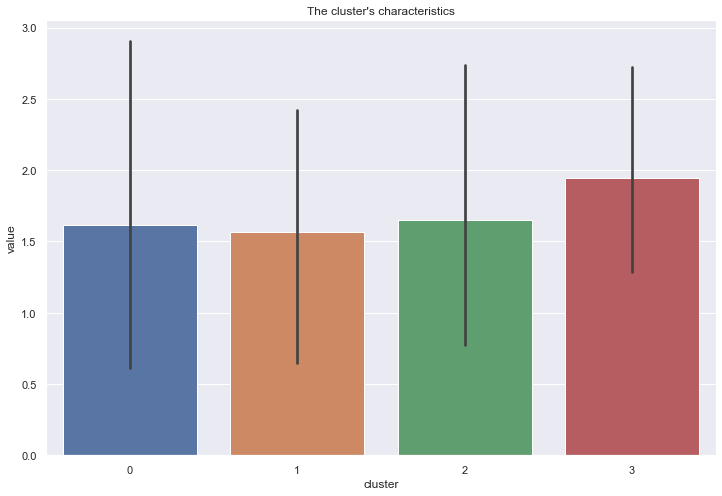

In [158]:
# distribution of sales


# Importing libraries
import seaborn as sns
import matplotlib.pyplot as plt# Create the dataframe to ease our visualization process
visualize = pd.DataFrame(km.cluster_centers_) #.reset_index()
visualize = visualize.T
#visualize['column'] = km.predict(data)
visualize = visualize.melt( var_name='Cluster')
visualize['cluster'] = data.kmeans_cluster# Visualize the result
plt.figure(figsize=(12, 8))
sns.barplot(x='cluster', y='value',  data=visualize)
plt.title('The cluster\'s characteristics')
plt.show()
